Importing libraries and setting up the working env.
---
---

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import datetime as dt
from cycler import cycler
from scipy.ndimage import gaussian_filter1d as gf1
from scipy.interpolate import interp1d

In [2]:
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['grid.linestyle'] = '--'
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']

In [3]:
figure_dir = 'figures'
tables_dir = 'tables'

colors = {
        'blue': 'blue',
        'red': 'red',
        'green': '#2ca02c',
        'orange': '#ff7f0e',
        'purple': '#9467bd',
        'cyan': '#17becf',
        'brown': '#8c564b',
        'gray': '#7f7f7f',
        'pink': '#e377c2',
        'olive': '#bcbd22',
    }

color_c = cycler('color', ['k'])
style_c = cycler('linestyle', ['-', '--', ':', '-.'])
markr_c = cycler('marker', ['', '.', 'o'])
c_cms = color_c * markr_c * style_c
c_csm = color_c * style_c * markr_c

# Create a list of colors from the dictionary
color_list = list(colors.values())

# Set the color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=color_list)

if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
if not os.path.exists(tables_dir):
    os.makedirs(tables_dir)
current_date = dt.datetime.now().strftime("%Y.%m.%d")
# Set font size and family 
plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family'] = "Times New Roman"
ills_path = "./illustrations/"
os.chdir(os.getcwd()) # Chang the working directory to the current one
print(f"Current date: {current_date}")

Current date: 2025.04.13


In [4]:
from DirParse import create_tiff_dataframe

df = create_tiff_dataframe("./data")

In [5]:
df

,uid,id,year,test_type,material,company,file_type,path
0,24_B_MAI_RS300_D_1,1,2024,bend,rs300,mai,cropped,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
1,24_B_MAI_RS300_D_10,10,2024,bend,rs300,mai,cropped,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
2,24_B_MAI_RS300_D_11,11,2024,bend,rs300,mai,cropped,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
3,24_B_MAI_RS300_D_12,12,2024,bend,rs300,mai,cropped,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
4,24_B_MAI_RS300_D_13,13,2024,bend,rs300,mai,cropped,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
...,...,...,...,...,...,...,...,...
817,24_T_ONSINT_RS300_D_8.2,82,2024,tens,rs300,onsint,masked,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
818,24_T_ONSINT_RS300_D_8.3,83,2024,tens,rs300,onsint,masked,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
819,24_T_ONSINT_RS300_D_9.1,91,2024,tens,rs300,onsint,masked,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...
820,24_T_ONSINT_RS300_D_9.2,92,2024,tens,rs300,onsint,masked,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...


c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Saved plot to: ./figures\2025-04-13_65_collage.png


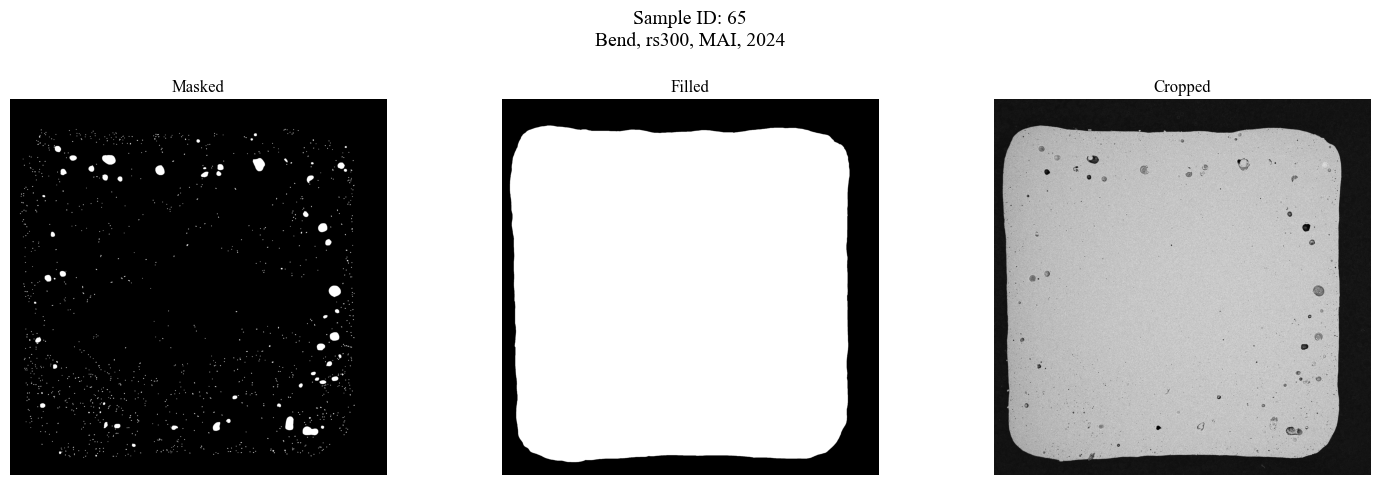

In [6]:
from plottingFuncs import plot_sample_images

# Plot one sample (random or specific)
plot_sample_images(
    df=df,
    figure_dir="./figures",
    current_date="2025-04-13",
    sample_id=None,  # or provide '2024_tens_mai_rs300_masked_5' etc.
    save=True
)

In [7]:
from imageProcessingFuncs import process_sample_images

COEF_PX2MM = 2 / 975
result_df = process_sample_images(df, COEF_PX2MM, current_date, tables_dir)

Processing samples:  61%|██████    | 69/114 [00:28<00:17,  2.57it/s]

Missing images for 01


Processing samples:  72%|███████▏  | 82/114 [00:32<00:09,  3.50it/s]

Missing images for 17 


Processing samples: 100%|██████████| 114/114 [00:38<00:00,  2.96it/s]


Missing images for 92_
Exported processed data to: tables\2025.04.13_processed_data.csv

Samples processed: 111
Total pores analyzed: 75715
Companies in dataset: ['mai' 'onsint']


In [8]:
del result_df
result_df = pd.read_csv(os.path.join(tables_dir, "2025.04.13_processed_data.csv"))
result_df

,sample_ID,year,test_type,company,material,dist,edge_dist,area,x,y,masked_path,filled_path,cropped_path,s_area,num_pores
0,1,2024,bend,mai,rs300,2045.036919,39.000000,0.002117,6.404103,7.757949,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,11885.871022,2904
1,1,2024,bend,mai,rs300,1943.395225,42.755117,0.005457,5.987692,7.757949,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,11885.871022,2904
2,1,2024,bend,mai,rs300,1914.095086,47.759816,0.004607,5.887179,7.741538,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,11885.871022,2904
3,1,2024,bend,mai,rs300,1717.961874,50.249378,0.003227,3.854359,7.733333,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,11885.871022,2904
4,1,2024,bend,mai,rs300,1831.232645,37.854986,0.009695,5.425641,7.753846,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,11885.871022,2904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75710,93,2024,tens,onsint,316L,532.640592,6.000000,0.000400,4.689231,0.588718,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,3878.370209,305
75711,93,2024,tens,onsint,316L,1437.783016,34.525353,0.000400,6.976410,0.582564,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,3878.370209,305
75712,93,2024,tens,onsint,316L,580.538543,8.944272,0.000400,4.867692,0.580513,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,3878.370209,305
75713,93,2024,tens,onsint,316L,517.982625,4.472136,0.000400,4.533333,0.555897,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,a:\YandexDisk\YandexDisk\ПИШ. LPBF- Общее\M350...,3878.370209,305
